In [32]:
from matplotlib import pyplot as plt
import imageio.v2 as imageio
import glob
import numpy as np
import scipy.ndimage as nd
import itertools
import os
import sys
sys.path.append('..')
import plot_helper as plt_hp

In [33]:
import importlib
importlib.reload(plt_hp)

<module 'plot_helper' from '../plot_helper.py'>

In [39]:
model_arch = 'resnet18'
target_image_dataset = 'cifar10'
training_dataset = 'cifar10'

append = 'nonrob_rand_seed_2'
seed = 'super-noise'

inversion_losses = ['reg_free', 'freq']
transform_robustness = [True, False]
ffts = [True, False]
additional_losses = ['adv_alex_finetuned', 'adv_alex_finetuned_seed', 
                     'adv_alex_imagenet', 'adv_alex_imagenet_seed']

In [40]:
headings = ['Target']
image_name_to_list = {}

common_filenames = []
for loss, tr, fft in list(itertools.product(inversion_losses, transform_robustness, ffts)):
    inverted_images_dir = f'./results/generated_images/{training_dataset}/'\
        f'{target_image_dataset}_{model_arch}_{loss}'
    if tr:
        inverted_images_dir += f'_transforms_{tr}'
    if fft:
        inverted_images_dir += '_fft'
    inverted_images_dir += f'_{append}'
    
    files = set([x.split('/')[-1] for x in \
                             glob.glob(f'{inverted_images_dir}/result/*_seed_{seed}.png')])
    if len(files) == 0:
        continue
    common_filenames.append(files)
for loss in additional_losses:
    inverted_images_dir = f'./results/generated_images/{training_dataset}/'\
        f'{target_image_dataset}_{model_arch}_{loss}_{append}'
    files = set([x.split('/')[-1] for x in \
                             glob.glob(f'{inverted_images_dir}/result/*_seed_{seed}.png')])
    if len(files) == 0:
        continue
    common_filenames.append(files)
    
common_filenames = set.intersection(*common_filenames)

for loss, tr, fft in itertools.product(inversion_losses, transform_robustness, ffts):
    inverted_images_dir = f'./results/generated_images/{training_dataset}/'\
        f'{target_image_dataset}_{model_arch}_{loss}'
        
    heading = loss
    if tr:
        inverted_images_dir += f'_transforms_{tr}'
        heading += '\ntrans'
    if fft:
        inverted_images_dir += '_fft'
        heading += ' \nfft'
    inverted_images_dir += f'_{append}'
    
    if len(glob.glob(f'{inverted_images_dir}/result/*_seed_{seed}.png')) == 0:
        continue

    headings.append(heading)
    
    for fname in common_filenames:
        result = imageio.imread(f'{inverted_images_dir}/result/{fname}')
        if fname not in image_name_to_list:
            target = imageio.imread(f'{inverted_images_dir}/target/{fname}')
            image_name_to_list[fname] = [target, result]
            assert len(image_name_to_list[fname]) == len(headings)
        else:
            image_name_to_list[fname].append(result)
            assert len(image_name_to_list[fname]) == len(headings)
for loss in additional_losses:
    inverted_images_dir = f'./results/generated_images/{training_dataset}/'\
        f'{target_image_dataset}_{model_arch}_{loss}_{append}'    
    
    if len(glob.glob(f'{inverted_images_dir}/result/*_seed_{seed}.png')) == 0:
        continue
    
    headings.append(loss)
    
    for fname in common_filenames:
        result = imageio.imread(f'{inverted_images_dir}/result/{fname}')
        image_name_to_list[fname].append(result)
        assert len(image_name_to_list[fname]) == len(headings)

In [41]:
headings

['Target',
 'reg_free\ntrans \nfft',
 'reg_free\ntrans',
 'reg_free \nfft',
 'reg_free',
 'freq\ntrans \nfft',
 'freq\ntrans',
 'freq',
 'freq',
 'freq']

Saved fig at ./results/visualize_inversions/cifar10/resnet18/nonrob_rand_seed_2_21_truck_seed_super-noise.pdf


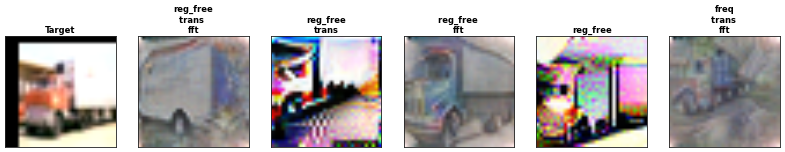

Saved fig at ./results/visualize_inversions/cifar10/resnet18/nonrob_rand_seed_2_4_cat_seed_super-noise.pdf


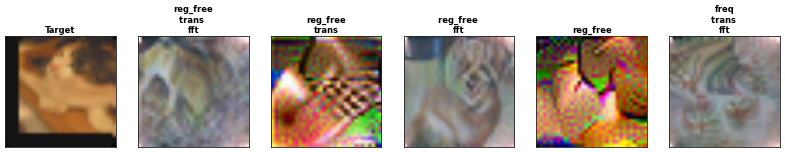

Saved fig at ./results/visualize_inversions/cifar10/resnet18/nonrob_rand_seed_2_17_airplane_seed_super-noise.pdf


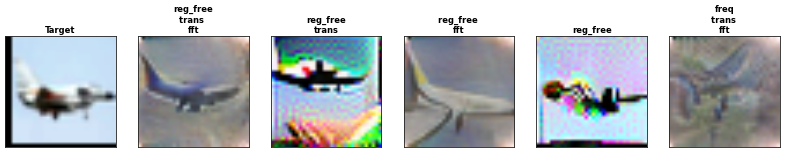

Saved fig at ./results/visualize_inversions/cifar10/resnet18/nonrob_rand_seed_2_15_cat_seed_super-noise.pdf


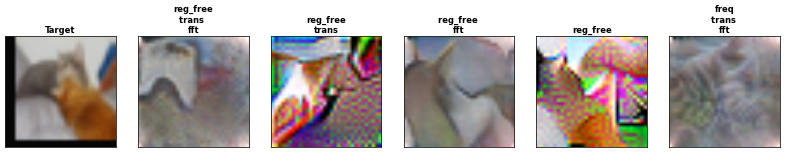

Saved fig at ./results/visualize_inversions/cifar10/resnet18/nonrob_rand_seed_2_12_horse_seed_super-noise.pdf


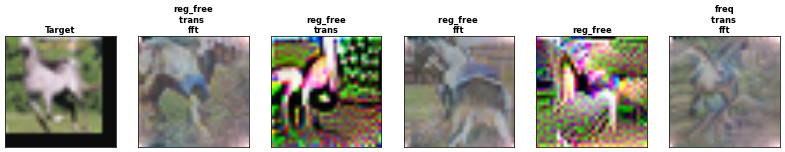

Saved fig at ./results/visualize_inversions/cifar10/resnet18/nonrob_rand_seed_2_18_automobile_seed_super-noise.pdf


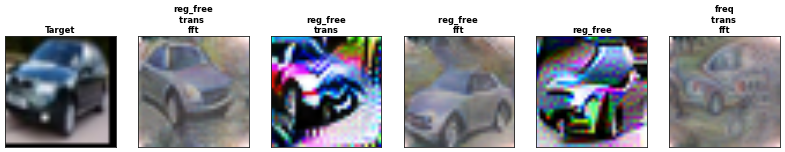

Saved fig at ./results/visualize_inversions/cifar10/resnet18/nonrob_rand_seed_2_23_automobile_seed_super-noise.pdf


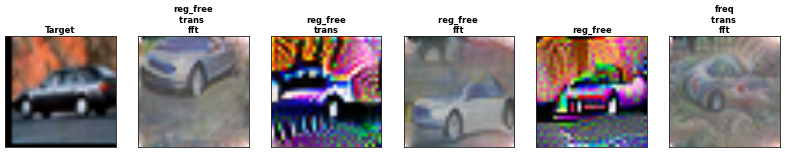

Saved fig at ./results/visualize_inversions/cifar10/resnet18/nonrob_rand_seed_2_31_airplane_seed_super-noise.pdf


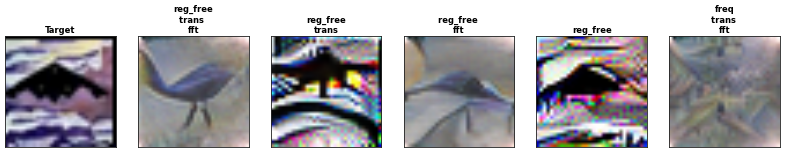

Saved fig at ./results/visualize_inversions/cifar10/resnet18/nonrob_rand_seed_2_9_airplane_seed_super-noise.pdf


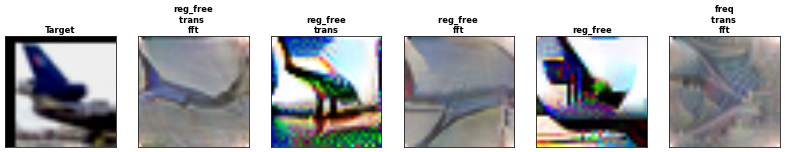

Saved fig at ./results/visualize_inversions/cifar10/resnet18/nonrob_rand_seed_2_2_truck_seed_super-noise.pdf


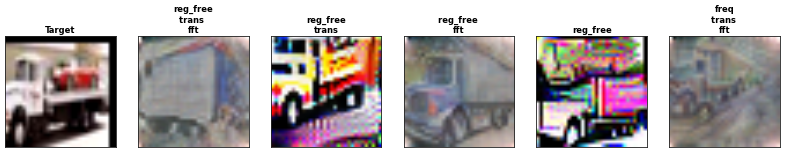

Saved fig at ./results/visualize_inversions/cifar10/resnet18/nonrob_rand_seed_2_26_frog_seed_super-noise.pdf


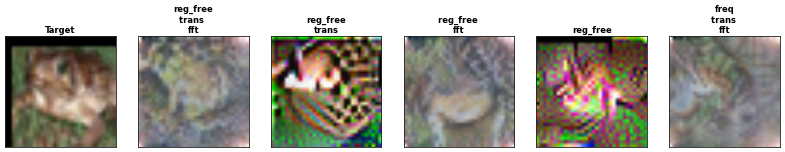

Saved fig at ./results/visualize_inversions/cifar10/resnet18/nonrob_rand_seed_2_14_dog_seed_super-noise.pdf


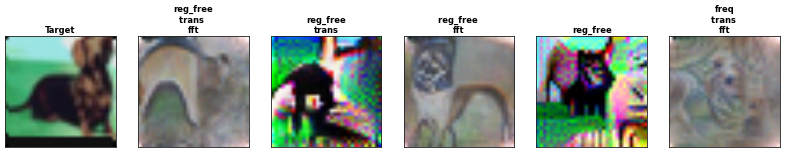

Saved fig at ./results/visualize_inversions/cifar10/resnet18/nonrob_rand_seed_2_10_bird_seed_super-noise.pdf


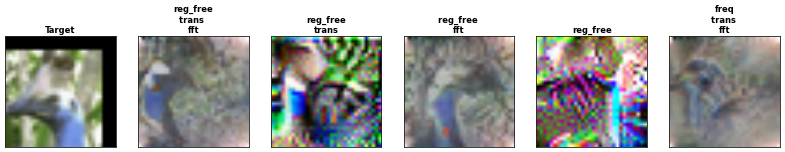

Saved fig at ./results/visualize_inversions/cifar10/resnet18/nonrob_rand_seed_2_7_deer_seed_super-noise.pdf


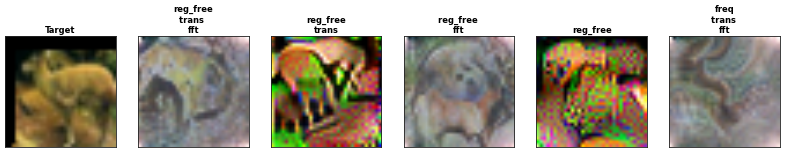

Saved fig at ./results/visualize_inversions/cifar10/resnet18/nonrob_rand_seed_2_3_horse_seed_super-noise.pdf


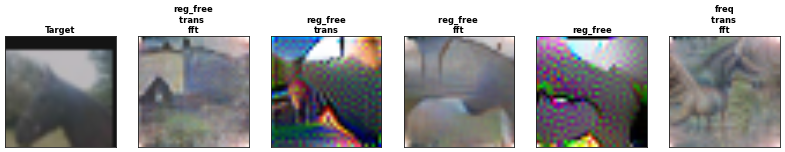

Saved fig at ./results/visualize_inversions/cifar10/resnet18/nonrob_rand_seed_2_27_dog_seed_super-noise.pdf


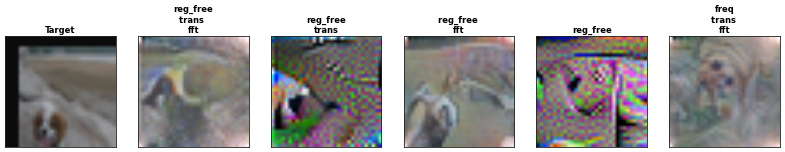

Saved fig at ./results/visualize_inversions/cifar10/resnet18/nonrob_rand_seed_2_0_automobile_seed_super-noise.pdf


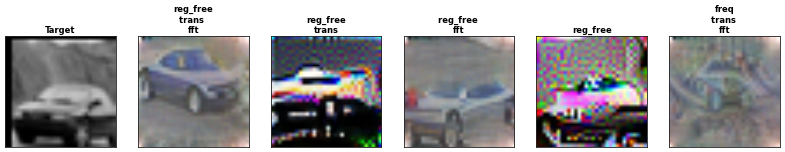

Saved fig at ./results/visualize_inversions/cifar10/resnet18/nonrob_rand_seed_2_24_bird_seed_super-noise.pdf


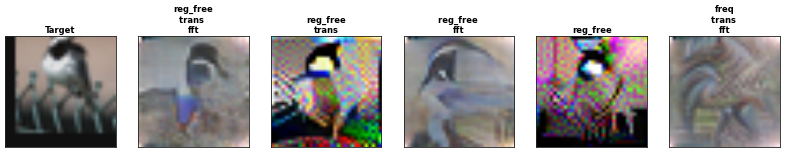

Saved fig at ./results/visualize_inversions/cifar10/resnet18/nonrob_rand_seed_2_28_bird_seed_super-noise.pdf


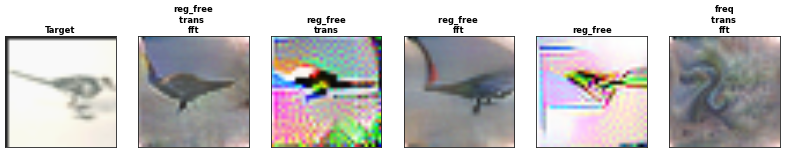

Saved fig at ./results/visualize_inversions/cifar10/resnet18/nonrob_rand_seed_2_29_airplane_seed_super-noise.pdf


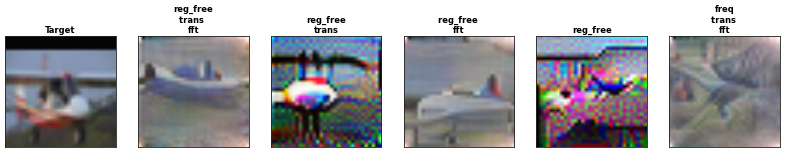

Saved fig at ./results/visualize_inversions/cifar10/resnet18/nonrob_rand_seed_2_19_ship_seed_super-noise.pdf


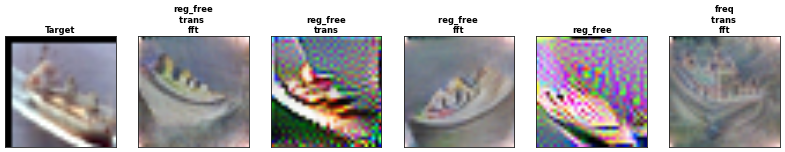

Saved fig at ./results/visualize_inversions/cifar10/resnet18/nonrob_rand_seed_2_5_automobile_seed_super-noise.pdf


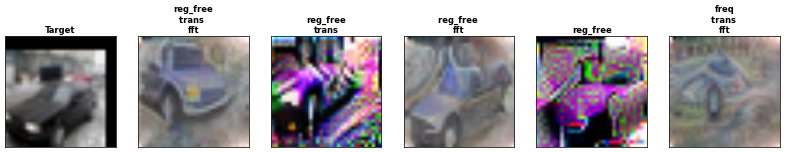

Saved fig at ./results/visualize_inversions/cifar10/resnet18/nonrob_rand_seed_2_25_bird_seed_super-noise.pdf


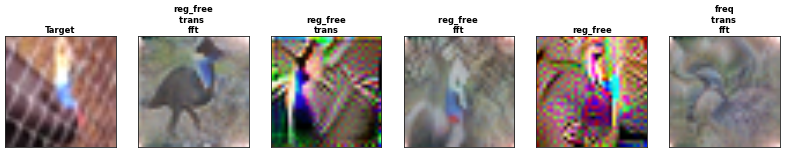

Saved fig at ./results/visualize_inversions/cifar10/resnet18/nonrob_rand_seed_2_6_deer_seed_super-noise.pdf


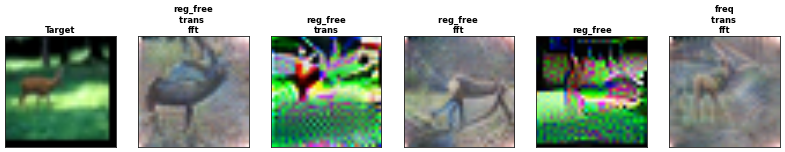

Saved fig at ./results/visualize_inversions/cifar10/resnet18/nonrob_rand_seed_2_13_bird_seed_super-noise.pdf


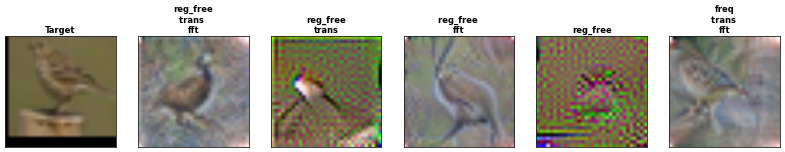

Saved fig at ./results/visualize_inversions/cifar10/resnet18/nonrob_rand_seed_2_8_deer_seed_super-noise.pdf


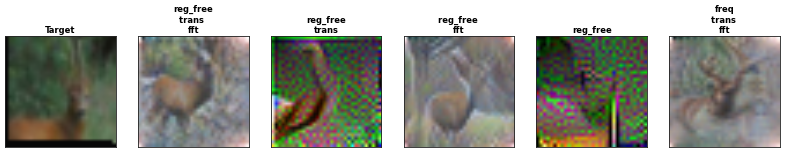

Saved fig at ./results/visualize_inversions/cifar10/resnet18/nonrob_rand_seed_2_1_ship_seed_super-noise.pdf


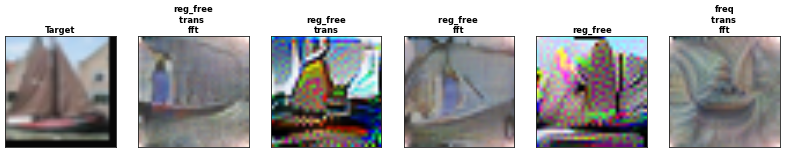

Saved fig at ./results/visualize_inversions/cifar10/resnet18/nonrob_rand_seed_2_30_truck_seed_super-noise.pdf


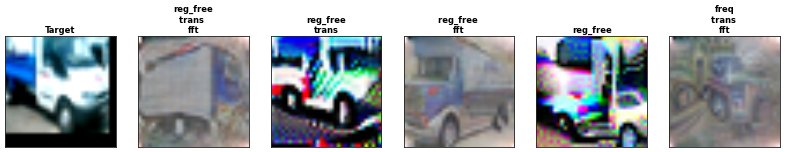

Saved fig at ./results/visualize_inversions/cifar10/resnet18/nonrob_rand_seed_2_11_frog_seed_super-noise.pdf


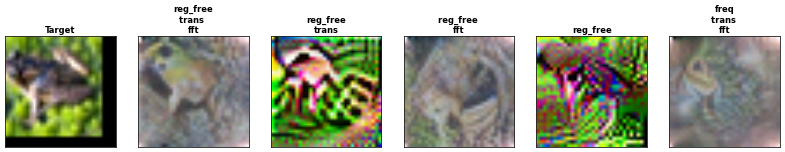

Saved fig at ./results/visualize_inversions/cifar10/resnet18/nonrob_rand_seed_2_22_truck_seed_super-noise.pdf


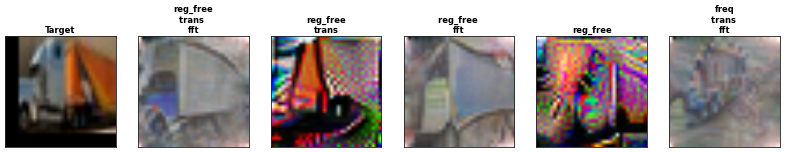

Saved fig at ./results/visualize_inversions/cifar10/resnet18/nonrob_rand_seed_2_16_ship_seed_super-noise.pdf


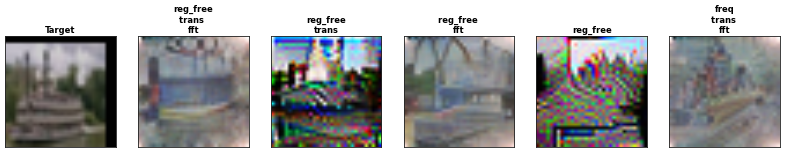

Saved fig at ./results/visualize_inversions/cifar10/resnet18/nonrob_rand_seed_2_20_horse_seed_super-noise.pdf


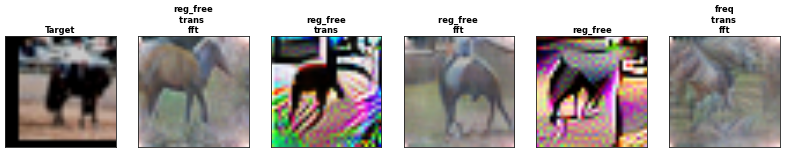

In [27]:
for k in image_name_to_list.keys():
    plt_hp.stitched_images(
        image_name_to_list[k], headings, 
        f'./results/visualize_inversions/{training_dataset}/{model_arch}', 
        f'{append}_{k[:-4]}', 'png', global_title='', columns=6, savefig=True, 
        plot_title_colors=None, figsize=(20,5), paper_friendly_plots=True)